In \[1\]:

    # This Python 3 environment comes with many helpful analytics libraries installed
    # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
    # For example, here's several helpful packages to load

    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import matplotlib.pyplot as plt
    import seaborn as sns  # visualization tool
    from matplotlib.patches import Polygon


    # Input data files are available in the read-only "../input/" directory
    # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

    # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
    # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

    /kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv

In \[2\]:

    df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
    df

Out\[2\]:

|     | Name                                              | Author                   | User Rating | Reviews | Price | Year | Genre       |
|-----|---------------------------------------------------|--------------------------|-------------|---------|-------|------|-------------|
| 0   | 10-Day Green Smoothie Cleanse                     | JJ Smith                 | 4.7         | 17350   | 8     | 2016 | Non Fiction |
| 1   | 11/22/63: A Novel                                 | Stephen King             | 4.6         | 2052    | 22    | 2011 | Fiction     |
| 2   | 12 Rules for Life: An Antidote to Chaos           | Jordan B. Peterson       | 4.7         | 18979   | 15    | 2018 | Non Fiction |
| 3   | 1984 (Signet Classics)                            | George Orwell            | 4.7         | 21424   | 6     | 2017 | Fiction     |
| 4   | 5,000 Awesome Facts (About Everything!) (Natio... | National Geographic Kids | 4.8         | 7665    | 12    | 2019 | Non Fiction |
| ... | ...                                               | ...                      | ...         | ...     | ...   | ...  | ...         |
| 545 | Wrecking Ball (Diary of a Wimpy Kid Book 14)      | Jeff Kinney              | 4.9         | 9413    | 8     | 2019 | Fiction     |
| 546 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2016 | Non Fiction |
| 547 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2017 | Non Fiction |
| 548 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2018 | Non Fiction |
| 549 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2019 | Non Fiction |

550 rows × 7 columns

In \[3\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 550 entries, 0 to 549
    Data columns (total 7 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   Name         550 non-null    object 
     1   Author       550 non-null    object 
     2   User Rating  550 non-null    float64
     3   Reviews      550 non-null    int64  
     4   Price        550 non-null    int64  
     5   Year         550 non-null    int64  
     6   Genre        550 non-null    object 
    dtypes: float64(1), int64(3), object(3)
    memory usage: 30.2+ KB

In \[4\]:

    print(df.columns) # There  are seven feature

    Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In \[5\]:

    df.columns =['Name', 'Author', 'User_Rating', 'Reviews', 'Price', 'Year', 'Genre']
    df.columns

Out\[5\]:

    Index(['Name', 'Author', 'User_Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In \[6\]:

    df.describe()

Out\[6\]:

|       | User_Rating | Reviews      | Price      | Year        |
|-------|-------------|--------------|------------|-------------|
| count | 550.000000  | 550.000000   | 550.000000 | 550.000000  |
| mean  | 4.618364    | 11953.281818 | 13.100000  | 2014.000000 |
| std   | 0.226980    | 11731.132017 | 10.842262  | 3.165156    |
| min   | 3.300000    | 37.000000    | 0.000000   | 2009.000000 |
| 25%   | 4.500000    | 4058.000000  | 7.000000   | 2011.000000 |
| 50%   | 4.700000    | 8580.000000  | 11.000000  | 2014.000000 |
| 75%   | 4.800000    | 17253.250000 | 16.000000  | 2017.000000 |
| max   | 4.900000    | 87841.000000 | 105.000000 | 2019.000000 |

In \[7\]:

    genre = df.Genre.unique()
    print(genre)  # we have two genre. These are Non Ficton and Fiction

    ['Non Fiction' 'Fiction']

## Correlation map<a href="#Correlation-map" class="anchor-link">¶</a>

In \[8\]:

    df.corr() 

Out\[8\]:

|             | User_Rating | Reviews   | Price     | Year      |
|-------------|-------------|-----------|-----------|-----------|
| User_Rating | 1.000000    | -0.001729 | -0.133086 | 0.242383  |
| Reviews     | -0.001729   | 1.000000  | -0.109182 | 0.263560  |
| Price       | -0.133086   | -0.109182 | 1.000000  | -0.153979 |
| Year        | 0.242383    | 0.263560  | -0.153979 | 1.000000  |

In \[9\]:

    plt.figure(figsize=(11,11))
    sns.heatmap(df.corr(), annot = True, linewidths=.8, fmt= '.3f', cmap = "coolwarm")
    plt.show()

<img src="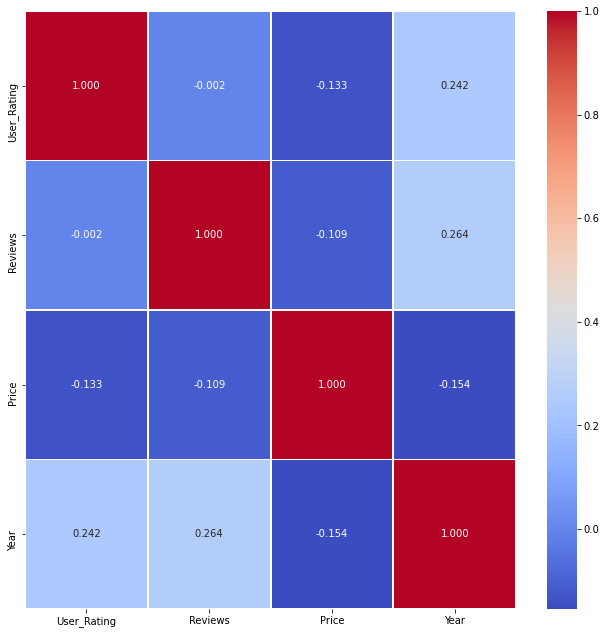%0A" class="jp-needs-light-background" />

no clear correlation

## Line Plot<a href="#Line-Plot" class="anchor-link">¶</a>

In \[10\]:

    fiction = df[df.Genre == 'Fiction']
    non_fiction = df[df.Genre == 'Non Fiction']

In \[11\]:

    df.Reviews.plot(kind = 'line', grid = True, label = 'Reviews',linewidth=1,alpha = 0.7, figsize = (7,6))
    plt.legend(loc = 'best')
    plt.ylabel('Reviews')
    plt.show()

<img src="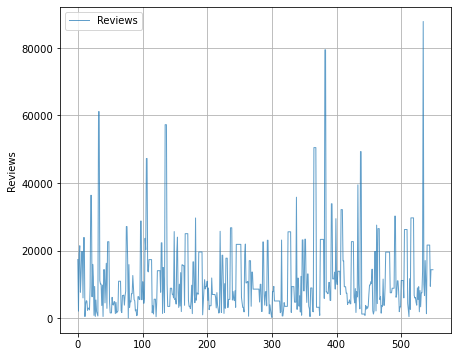%0A" class="jp-needs-light-background" />

## Scatter Plot<a href="#Scatter-Plot" class="anchor-link">¶</a>

In \[12\]:

    df.plot(kind = 'scatter', x = 'Price', y = 'Reviews',alpha = 0.5,color = 'y')
    plt.xlabel('Price')              # label = name of label
    plt.ylabel('Reviews')
    plt.title('Price Reviews Scatter Plot')   
    plt.show()

<img src="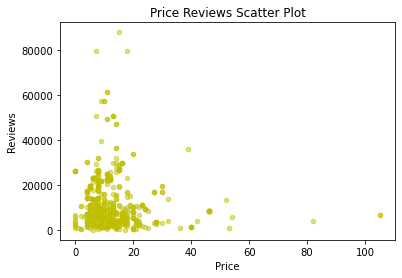%0A" class="jp-needs-light-background" />

## Histogram<a href="#Histogram" class="anchor-link">¶</a>

In \[13\]:

    plt.subplot(2,2,1)
    fiction.User_Rating.plot(kind = 'hist', bins = 25,color = 'orange', figsize=(12,12), label = 'Ficton')
    non_fiction.User_Rating.plot(kind = 'hist', bins = 25,color = 'green', figsize=(12,12), label = 'Non Ficton')
    plt.xlabel('User Rating')
    plt.legend(loc='upper left')
    plt.title('User Rating of Fiction Vs Non Fiction')

    plt.subplot(2,2,2)

    fiction.Reviews.plot(kind = 'hist', bins = 25,color = 'orange', figsize=(12,12), label = 'Ficton')
    non_fiction.Reviews.plot(kind = 'hist', bins = 25,color = 'g', figsize=(12,12), label = 'Non Ficton')
    plt.xlabel('Reviews')
    plt.legend(loc='upper right')
    plt.title('Reviews of Fiction Vs Non Fiction')

    plt.show()

<img src="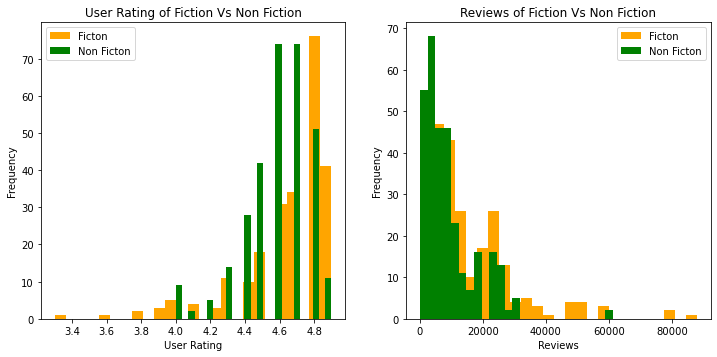%0A" class="jp-needs-light-background" />

In \[14\]:

    plt.subplot(2,2,1)
    fiction.Price.plot(kind = 'hist', bins = 75,color = 'orange', figsize=(12,12), label = 'Ficton')
    non_fiction.Price.plot(kind = 'hist', bins = 75,color = 'g', figsize=(12,12), label = 'Non Ficton')
    plt.xlabel('Price')
    plt.legend(loc='upper right')
    plt.title('Price of Fiction Vs Non Fiction')

    plt.subplot(2,2,2)

    fiction.Year.plot(kind = 'hist', bins = 50,color = 'orange', figsize=(12,12), label = 'Ficton')
    non_fiction.Year.plot(kind = 'hist', bins = 50,color = 'g', figsize=(12,12), label = 'Non Ficton')
    plt.xlabel('Year')
    plt.legend(loc='upper left')
    plt.title('Year of Fiction Vs Non Fiction')
    plt.show()

<img src="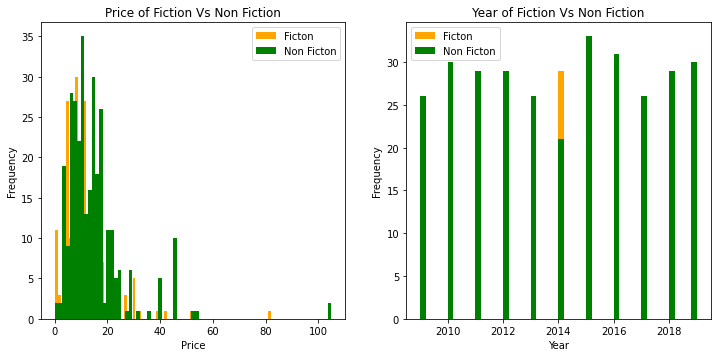%0A" class="jp-needs-light-background" />

## Bar Plot<a href="#Bar-Plot" class="anchor-link">¶</a>

In \[15\]:

    year = df.Year.unique()
    plt.figure(figsize=(10,7))
    plt.bar(df.Year,df.Price , color="#3265a8", label = 'Price')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.title('Price - Year')
    plt.show()

<img src="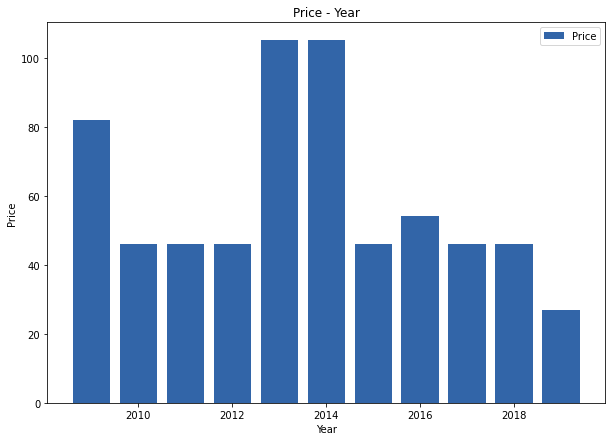%0A" class="jp-needs-light-background" />

In \[16\]:

    df.Price.mean()

Out\[16\]:

    13.1

In \[17\]:

    df["price_threshold"] = ["high" if i>df.Price.mean() else "low" for i in df.Price]

In \[18\]:

    df

Out\[18\]:

|     | Name                                              | Author                   | User_Rating | Reviews | Price | Year | Genre       | price_threshold |
|-----|---------------------------------------------------|--------------------------|-------------|---------|-------|------|-------------|-----------------|
| 0   | 10-Day Green Smoothie Cleanse                     | JJ Smith                 | 4.7         | 17350   | 8     | 2016 | Non Fiction | low             |
| 1   | 11/22/63: A Novel                                 | Stephen King             | 4.6         | 2052    | 22    | 2011 | Fiction     | high            |
| 2   | 12 Rules for Life: An Antidote to Chaos           | Jordan B. Peterson       | 4.7         | 18979   | 15    | 2018 | Non Fiction | high            |
| 3   | 1984 (Signet Classics)                            | George Orwell            | 4.7         | 21424   | 6     | 2017 | Fiction     | low             |
| 4   | 5,000 Awesome Facts (About Everything!) (Natio... | National Geographic Kids | 4.8         | 7665    | 12    | 2019 | Non Fiction | low             |
| ... | ...                                               | ...                      | ...         | ...     | ...   | ...  | ...         | ...             |
| 545 | Wrecking Ball (Diary of a Wimpy Kid Book 14)      | Jeff Kinney              | 4.9         | 9413    | 8     | 2019 | Fiction     | low             |
| 546 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2016 | Non Fiction | low             |
| 547 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2017 | Non Fiction | low             |
| 548 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2018 | Non Fiction | low             |
| 549 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2019 | Non Fiction | low             |

550 rows × 8 columns

# Cleaning Data<a href="#Cleaning-Data" class="anchor-link">¶</a>

In \[19\]:

    print(df.Genre.value_counts(dropna = False))

    Non Fiction    310
    Fiction        240
    Name: Genre, dtype: int64

In \[20\]:

    print(df.price_threshold.value_counts(dropna =False ))

    low     357
    high    193
    Name: price_threshold, dtype: int64

In \[21\]:

    print(df.Year.value_counts(dropna = False))

    2019    50
    2018    50
    2017    50
    2016    50
    2015    50
    2014    50
    2013    50
    2012    50
    2011    50
    2010    50
    2009    50
    Name: Year, dtype: int64

In \[22\]:

    print(df.Author.value_counts(dropna = False))

    Jeff Kinney                           12
    Rick Riordan                          11
    Gary Chapman                          11
    Suzanne Collins                       11
    American Psychological Association    10
                                          ..
    Angie Grace                            1
    Eric Larson                            1
    Chris Cleave                           1
    Randy Pausch                           1
    Mark Owen                              1
    Name: Author, Length: 248, dtype: int64

In \[23\]:

    df.describe()

Out\[23\]:

|       | User_Rating | Reviews      | Price      | Year        |
|-------|-------------|--------------|------------|-------------|
| count | 550.000000  | 550.000000   | 550.000000 | 550.000000  |
| mean  | 4.618364    | 11953.281818 | 13.100000  | 2014.000000 |
| std   | 0.226980    | 11731.132017 | 10.842262  | 3.165156    |
| min   | 3.300000    | 37.000000    | 0.000000   | 2009.000000 |
| 25%   | 4.500000    | 4058.000000  | 7.000000   | 2011.000000 |
| 50%   | 4.700000    | 8580.000000  | 11.000000  | 2014.000000 |
| 75%   | 4.800000    | 17253.250000 | 16.000000  | 2017.000000 |
| max   | 4.900000    | 87841.000000 | 105.000000 | 2019.000000 |

# VISUAL EXPLORATORY DATA ANALYSIS<a href="#VISUAL-EXPLORATORY-DATA-ANALYSIS" class="anchor-link">¶</a>

## Box plot<a href="#Box-plot" class="anchor-link">¶</a>

In \[24\]:

    fig,axs = plt.subplots(1,2, figsize = (12,6))
    fig.suptitle('Reviews grouped by genre and price threshold')

    df.boxplot(column = 'Reviews', by = 'Genre', ax = axs[0])

    df.boxplot(column = 'Reviews', by = 'price_threshold', ax = axs[1])
    #plt.tight_layout() 


    plt.show()

<img src="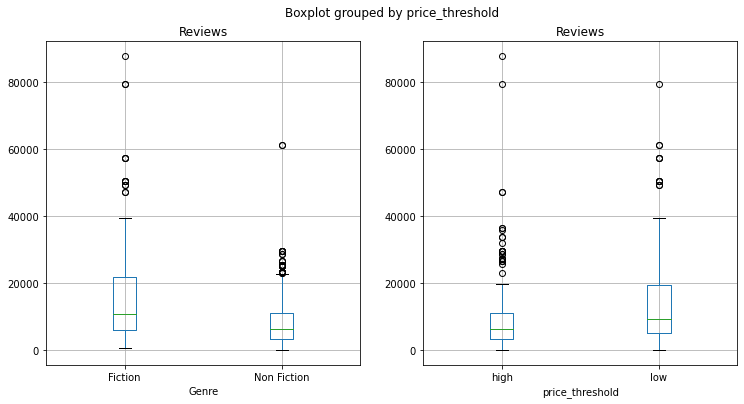%0A" class="jp-needs-light-background" />

In \[25\]:

    fig, axs = plt.subplots(1,2, figsize = (10,8))
    df.boxplot(column = 'Price', by = 'Genre', ax = axs[0])

    df.boxplot(column = 'Price', by = 'price_threshold', ax = axs[1])

    plt.show()

<img src="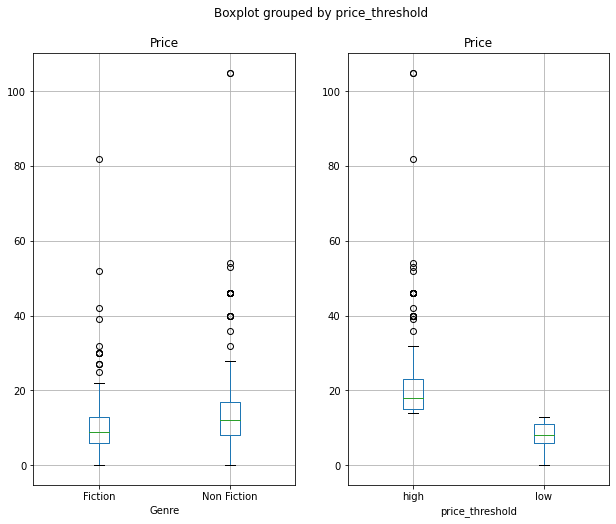%0A" class="jp-needs-light-background" />

In \[26\]:

    df.describe()

Out\[26\]:

|       | User_Rating | Reviews      | Price      | Year        |
|-------|-------------|--------------|------------|-------------|
| count | 550.000000  | 550.000000   | 550.000000 | 550.000000  |
| mean  | 4.618364    | 11953.281818 | 13.100000  | 2014.000000 |
| std   | 0.226980    | 11731.132017 | 10.842262  | 3.165156    |
| min   | 3.300000    | 37.000000    | 0.000000   | 2009.000000 |
| 25%   | 4.500000    | 4058.000000  | 7.000000   | 2011.000000 |
| 50%   | 4.700000    | 8580.000000  | 11.000000  | 2014.000000 |
| 75%   | 4.800000    | 17253.250000 | 16.000000  | 2017.000000 |
| max   | 4.900000    | 87841.000000 | 105.000000 | 2019.000000 |

In \[27\]:

    tidyData = df.head()
    melted = pd.melt(frame = tidyData, id_vars= 'Name', value_vars = ['Price', 'Year'] )
    melted

Out\[27\]:

|     | Name                                              | variable | value |
|-----|---------------------------------------------------|----------|-------|
| 0   | 10-Day Green Smoothie Cleanse                     | Price    | 8     |
| 1   | 11/22/63: A Novel                                 | Price    | 22    |
| 2   | 12 Rules for Life: An Antidote to Chaos           | Price    | 15    |
| 3   | 1984 (Signet Classics)                            | Price    | 6     |
| 4   | 5,000 Awesome Facts (About Everything!) (Natio... | Price    | 12    |
| 5   | 10-Day Green Smoothie Cleanse                     | Year     | 2016  |
| 6   | 11/22/63: A Novel                                 | Year     | 2011  |
| 7   | 12 Rules for Life: An Antidote to Chaos           | Year     | 2018  |
| 8   | 1984 (Signet Classics)                            | Year     | 2017  |
| 9   | 5,000 Awesome Facts (About Everything!) (Natio... | Year     | 2019  |

### PIVOTING DATA<a href="#PIVOTING-DATA" class="anchor-link">¶</a>

Reverse of melting

unmelted

In \[28\]:

    melted.pivot(index = 'Name', columns = 'variable', values =  'value')

Out\[28\]:

| variable                                                           | Price | Year |
|--------------------------------------------------------------------|-------|------|
| Name                                                               |       |      |
| 10-Day Green Smoothie Cleanse                                      | 8     | 2016 |
| 11/22/63: A Novel                                                  | 22    | 2011 |
| 12 Rules for Life: An Antidote to Chaos                            | 15    | 2018 |
| 1984 (Signet Classics)                                             | 6     | 2017 |
| 5,000 Awesome Facts (About Everything!) (National Geographic Kids) | 12    | 2019 |

### CONCATENATING DATA<a href="#CONCATENATING-DATA" class="anchor-link">¶</a>

In \[29\]:

    head_tail = pd.concat([df.head(),df.tail()], axis = 0)
    head_tail

Out\[29\]:

|     | Name                                              | Author                   | User_Rating | Reviews | Price | Year | Genre       | price_threshold |
|-----|---------------------------------------------------|--------------------------|-------------|---------|-------|------|-------------|-----------------|
| 0   | 10-Day Green Smoothie Cleanse                     | JJ Smith                 | 4.7         | 17350   | 8     | 2016 | Non Fiction | low             |
| 1   | 11/22/63: A Novel                                 | Stephen King             | 4.6         | 2052    | 22    | 2011 | Fiction     | high            |
| 2   | 12 Rules for Life: An Antidote to Chaos           | Jordan B. Peterson       | 4.7         | 18979   | 15    | 2018 | Non Fiction | high            |
| 3   | 1984 (Signet Classics)                            | George Orwell            | 4.7         | 21424   | 6     | 2017 | Fiction     | low             |
| 4   | 5,000 Awesome Facts (About Everything!) (Natio... | National Geographic Kids | 4.8         | 7665    | 12    | 2019 | Non Fiction | low             |
| 545 | Wrecking Ball (Diary of a Wimpy Kid Book 14)      | Jeff Kinney              | 4.9         | 9413    | 8     | 2019 | Fiction     | low             |
| 546 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2016 | Non Fiction | low             |
| 547 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2017 | Non Fiction | low             |
| 548 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2018 | Non Fiction | low             |
| 549 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2019 | Non Fiction | low             |

In \[30\]:

    name_author = pd.concat([df.Name,df.Author], axis = 1)
    name_author

Out\[30\]:

|     | Name                                              | Author                   |
|-----|---------------------------------------------------|--------------------------|
| 0   | 10-Day Green Smoothie Cleanse                     | JJ Smith                 |
| 1   | 11/22/63: A Novel                                 | Stephen King             |
| 2   | 12 Rules for Life: An Antidote to Chaos           | Jordan B. Peterson       |
| 3   | 1984 (Signet Classics)                            | George Orwell            |
| 4   | 5,000 Awesome Facts (About Everything!) (Natio... | National Geographic Kids |
| ... | ...                                               | ...                      |
| 545 | Wrecking Ball (Diary of a Wimpy Kid Book 14)      | Jeff Kinney              |
| 546 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              |
| 547 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              |
| 548 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              |
| 549 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              |

550 rows × 2 columns

In \[31\]:

    df.dtypes

Out\[31\]:

    Name                object
    Author              object
    User_Rating        float64
    Reviews              int64
    Price                int64
    Year                 int64
    Genre               object
    price_threshold     object
    dtype: object

In \[32\]:

    df['Genre'] = df['Genre'].astype('category')
    df.Genre

Out\[32\]:

    0      Non Fiction
    1          Fiction
    2      Non Fiction
    3          Fiction
    4      Non Fiction
              ...     
    545        Fiction
    546    Non Fiction
    547    Non Fiction
    548    Non Fiction
    549    Non Fiction
    Name: Genre, Length: 550, dtype: category
    Categories (2, object): ['Fiction', 'Non Fiction']

In \[33\]:

    df.dtypes

Out\[33\]:

    Name                 object
    Author               object
    User_Rating         float64
    Reviews               int64
    Price                 int64
    Year                  int64
    Genre              category
    price_threshold      object
    dtype: object

In \[34\]:

    df.info() # there is no null 

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 550 entries, 0 to 549
    Data columns (total 8 columns):
     #   Column           Non-Null Count  Dtype   
    ---  ------           --------------  -----   
     0   Name             550 non-null    object  
     1   Author           550 non-null    object  
     2   User_Rating      550 non-null    float64 
     3   Reviews          550 non-null    int64   
     4   Price            550 non-null    int64   
     5   Year             550 non-null    int64   
     6   Genre            550 non-null    category
     7   price_threshold  550 non-null    object  
    dtypes: category(1), float64(1), int64(3), object(3)
    memory usage: 30.8+ KB

## Review of Pandas<a href="#Review-of-Pandas" class="anchor-link">¶</a>

In \[35\]:

    df.plot(kind = "hist", y = "Price", bins = 25, range = (0,25), density = True)
    plt.show()

<img src="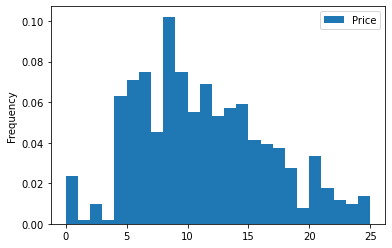%0A" class="jp-needs-light-background" />

In \[36\]:

    df.plot(kind = 'hist', y = "Price", bins =25, range= (0,25), density = True, cumulative = True)

Out\[36\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7f1489e16350>

<img src="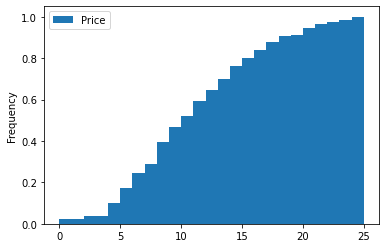%0A" class="jp-needs-light-background" />

## Indexing pandas time series<a href="#Indexing-pandas-time-series" class="anchor-link">¶</a>

In \[37\]:

    dt_object = pd.to_datetime(df.Year,format='%Y')
    df2 =df
    df2['date'] = dt_object
    df2 = df2.set_index("date")
    df2

Out\[37\]:

|            | Name                                              | Author                   | User_Rating | Reviews | Price | Year | Genre       | price_threshold |
|------------|---------------------------------------------------|--------------------------|-------------|---------|-------|------|-------------|-----------------|
| date       |                                                   |                          |             |         |       |      |             |                 |
| 2016-01-01 | 10-Day Green Smoothie Cleanse                     | JJ Smith                 | 4.7         | 17350   | 8     | 2016 | Non Fiction | low             |
| 2011-01-01 | 11/22/63: A Novel                                 | Stephen King             | 4.6         | 2052    | 22    | 2011 | Fiction     | high            |
| 2018-01-01 | 12 Rules for Life: An Antidote to Chaos           | Jordan B. Peterson       | 4.7         | 18979   | 15    | 2018 | Non Fiction | high            |
| 2017-01-01 | 1984 (Signet Classics)                            | George Orwell            | 4.7         | 21424   | 6     | 2017 | Fiction     | low             |
| 2019-01-01 | 5,000 Awesome Facts (About Everything!) (Natio... | National Geographic Kids | 4.8         | 7665    | 12    | 2019 | Non Fiction | low             |
| ...        | ...                                               | ...                      | ...         | ...     | ...   | ...  | ...         | ...             |
| 2019-01-01 | Wrecking Ball (Diary of a Wimpy Kid Book 14)      | Jeff Kinney              | 4.9         | 9413    | 8     | 2019 | Fiction     | low             |
| 2016-01-01 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2016 | Non Fiction | low             |
| 2017-01-01 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2017 | Non Fiction | low             |
| 2018-01-01 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2018 | Non Fiction | low             |
| 2019-01-01 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2019 | Non Fiction | low             |

550 rows × 8 columns

In \[38\]:

    df.Year.sort_values()

Out\[38\]:

    177    2009
    131    2009
    417    2009
    241    2009
    72     2009
           ... 
    150    2019
    466    2019
    462    2019
    130    2019
    549    2019
    Name: Year, Length: 550, dtype: int64

## Resampling pandas time series<a href="#Resampling-pandas-time-series" class="anchor-link">¶</a>

In \[39\]:

    df2.resample("A").mean()

Out\[39\]:

|            | User_Rating | Reviews  | Price | Year   |
|------------|-------------|----------|-------|--------|
| date       |             |          |       |        |
| 2009-12-31 | 4.584       | 4710.12  | 15.40 | 2009.0 |
| 2010-12-31 | 4.558       | 5479.62  | 13.48 | 2010.0 |
| 2011-12-31 | 4.558       | 8100.82  | 15.10 | 2011.0 |
| 2012-12-31 | 4.532       | 13090.92 | 15.30 | 2012.0 |
| 2013-12-31 | 4.554       | 13098.14 | 14.60 | 2013.0 |
| 2014-12-31 | 4.622       | 15859.94 | 14.64 | 2014.0 |
| 2015-12-31 | 4.648       | 14233.38 | 10.42 | 2015.0 |
| 2016-12-31 | 4.678       | 14196.00 | 13.18 | 2016.0 |
| 2017-12-31 | 4.660       | 12888.40 | 11.38 | 2017.0 |
| 2018-12-31 | 4.668       | 13930.42 | 10.52 | 2018.0 |
| 2019-12-31 | 4.740       | 15898.34 | 10.08 | 2019.0 |

In \[40\]:

    df2.resample("A").sum()

Out\[40\]:

|            | User_Rating | Reviews | Price | Year   |
|------------|-------------|---------|-------|--------|
| date       |             |         |       |        |
| 2009-12-31 | 229.2       | 235506  | 770   | 100450 |
| 2010-12-31 | 227.9       | 273981  | 674   | 100500 |
| 2011-12-31 | 227.9       | 405041  | 755   | 100550 |
| 2012-12-31 | 226.6       | 654546  | 765   | 100600 |
| 2013-12-31 | 227.7       | 654907  | 730   | 100650 |
| 2014-12-31 | 231.1       | 792997  | 732   | 100700 |
| 2015-12-31 | 232.4       | 711669  | 521   | 100750 |
| 2016-12-31 | 233.9       | 709800  | 659   | 100800 |
| 2017-12-31 | 233.0       | 644420  | 569   | 100850 |
| 2018-12-31 | 233.4       | 696521  | 526   | 100900 |
| 2019-12-31 | 237.0       | 794917  | 504   | 100950 |

## Hierarchical indexing<a href="#Hierarchical-indexing" class="anchor-link">¶</a>

In \[41\]:

    df.set_index(["Author","Name"]) # we can see who has written how many books

Out\[41\]:

|                          |                                                                                        | User_Rating | Reviews | Price | Year | Genre       | price_threshold | date       |
|--------------------------|----------------------------------------------------------------------------------------|-------------|---------|-------|------|-------------|-----------------|------------|
| Author                   | Name                                                                                   |             |         |       |      |             |                 |            |
| JJ Smith                 | 10-Day Green Smoothie Cleanse                                                          | 4.7         | 17350   | 8     | 2016 | Non Fiction | low             | 2016-01-01 |
| Stephen King             | 11/22/63: A Novel                                                                      | 4.6         | 2052    | 22    | 2011 | Fiction     | high            | 2011-01-01 |
| Jordan B. Peterson       | 12 Rules for Life: An Antidote to Chaos                                                | 4.7         | 18979   | 15    | 2018 | Non Fiction | high            | 2018-01-01 |
| George Orwell            | 1984 (Signet Classics)                                                                 | 4.7         | 21424   | 6     | 2017 | Fiction     | low             | 2017-01-01 |
| National Geographic Kids | 5,000 Awesome Facts (About Everything!) (National Geographic Kids)                     | 4.8         | 7665    | 12    | 2019 | Non Fiction | low             | 2019-01-01 |
| ...                      | ...                                                                                    | ...         | ...     | ...   | ...  | ...         | ...             | ...        |
| Jeff Kinney              | Wrecking Ball (Diary of a Wimpy Kid Book 14)                                           | 4.9         | 9413    | 8     | 2019 | Fiction     | low             | 2019-01-01 |
| Jen Sincero              | You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life | 4.7         | 14331   | 8     | 2016 | Non Fiction | low             | 2016-01-01 |
|                          | You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life | 4.7         | 14331   | 8     | 2017 | Non Fiction | low             | 2017-01-01 |
|                          | You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life | 4.7         | 14331   | 8     | 2018 | Non Fiction | low             | 2018-01-01 |
|                          | You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life | 4.7         | 14331   | 8     | 2019 | Non Fiction | low             | 2019-01-01 |

550 rows × 7 columns

In \[42\]:

    df

Out\[42\]:

|     | Name                                              | Author                   | User_Rating | Reviews | Price | Year | Genre       | price_threshold | date       |
|-----|---------------------------------------------------|--------------------------|-------------|---------|-------|------|-------------|-----------------|------------|
| 0   | 10-Day Green Smoothie Cleanse                     | JJ Smith                 | 4.7         | 17350   | 8     | 2016 | Non Fiction | low             | 2016-01-01 |
| 1   | 11/22/63: A Novel                                 | Stephen King             | 4.6         | 2052    | 22    | 2011 | Fiction     | high            | 2011-01-01 |
| 2   | 12 Rules for Life: An Antidote to Chaos           | Jordan B. Peterson       | 4.7         | 18979   | 15    | 2018 | Non Fiction | high            | 2018-01-01 |
| 3   | 1984 (Signet Classics)                            | George Orwell            | 4.7         | 21424   | 6     | 2017 | Fiction     | low             | 2017-01-01 |
| 4   | 5,000 Awesome Facts (About Everything!) (Natio... | National Geographic Kids | 4.8         | 7665    | 12    | 2019 | Non Fiction | low             | 2019-01-01 |
| ... | ...                                               | ...                      | ...         | ...     | ...   | ...  | ...         | ...             | ...        |
| 545 | Wrecking Ball (Diary of a Wimpy Kid Book 14)      | Jeff Kinney              | 4.9         | 9413    | 8     | 2019 | Fiction     | low             | 2019-01-01 |
| 546 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2016 | Non Fiction | low             | 2016-01-01 |
| 547 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2017 | Non Fiction | low             | 2017-01-01 |
| 548 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2018 | Non Fiction | low             | 2018-01-01 |
| 549 | You Are a Badass: How to Stop Doubting Your Gr... | Jen Sincero              | 4.7         | 14331   | 8     | 2019 | Non Fiction | low             | 2019-01-01 |

550 rows × 9 columns

In \[43\]:

    # df.pivot(index = "price_threshold", columns = 'Genre', values = 'Reviews') i have a problem

## Groupby<a href="#Groupby" class="anchor-link">¶</a>

In \[44\]:

    df.groupby("Year").mean()

Out\[44\]:

|      | User_Rating | Reviews  | Price |
|------|-------------|----------|-------|
| Year |             |          |       |
| 2009 | 4.584       | 4710.12  | 15.40 |
| 2010 | 4.558       | 5479.62  | 13.48 |
| 2011 | 4.558       | 8100.82  | 15.10 |
| 2012 | 4.532       | 13090.92 | 15.30 |
| 2013 | 4.554       | 13098.14 | 14.60 |
| 2014 | 4.622       | 15859.94 | 14.64 |
| 2015 | 4.648       | 14233.38 | 10.42 |
| 2016 | 4.678       | 14196.00 | 13.18 |
| 2017 | 4.660       | 12888.40 | 11.38 |
| 2018 | 4.668       | 13930.42 | 10.52 |
| 2019 | 4.740       | 15898.34 | 10.08 |

In \[45\]:

    df.groupby("Year").max()

Out\[45\]:

|      | Name                                              | Author           | User_Rating | Reviews | Price | price_threshold | date       |
|------|---------------------------------------------------|------------------|-------------|---------|-------|-----------------|------------|
| Year |                                                   |                  |             |         |       |                 |            |
| 2009 | Where the Wild Things Are                         | Zhi Gang Sha     | 4.8         | 19720   | 82    | low             | 2009-01-01 |
| 2010 | Women Food and God: An Unexpected Path to Almo... | Tony Hsieh       | 4.8         | 32122   | 46    | low             | 2010-01-01 |
| 2011 | What to Expect When You're Expecting              | Walter Isaacson  | 4.9         | 32122   | 46    | low             | 2011-01-01 |
| 2012 | Winter of the World: Book Two of the Century T... | William Davis    | 4.9         | 57271   | 46    | low             | 2012-01-01 |
| 2013 | Wonder                                            | Zhi Gang Sha     | 4.9         | 57271   | 105   | low             | 2013-01-01 |
| 2014 | Wonder                                            | Veronica Roth    | 4.9         | 57271   | 105   | low             | 2014-01-01 |
| 2015 | Wonder                                            | Thug Kitchen     | 4.9         | 79446   | 46    | low             | 2015-01-01 |
| 2016 | You Are a Badass: How to Stop Doubting Your Gr... | Thug Kitchen     | 4.9         | 79446   | 54    | low             | 2016-01-01 |
| 2017 | You Are a Badass: How to Stop Doubting Your Gr... | Wizards RPG Team | 4.9         | 29442   | 46    | low             | 2017-01-01 |
| 2018 | You Are a Badass: How to Stop Doubting Your Gr... | Wizards RPG Team | 4.9         | 61133   | 46    | low             | 2018-01-01 |
| 2019 | You Are a Badass: How to Stop Doubting Your Gr... | Wizards RPG Team | 4.9         | 87841   | 27    | low             | 2019-01-01 |

In \[46\]:

    df.groupby("Year").describe()[['Price','User_Rating']]

Out\[46\]:

|      | Price |       |           |     |      |      |       |       | User_Rating |       |          |     |       |      |     |     |
|------|-------|-------|-----------|-----|------|------|-------|-------|-------------|-------|----------|-----|-------|------|-----|-----|
|      | count | mean  | std       | min | 25%  | 50%  | 75%   | max   | count       | mean  | std      | min | 25%   | 50%  | 75% | max |
| Year |       |       |           |     |      |      |       |       |             |       |          |     |       |      |     |     |
| 2009 | 50.0  | 15.40 | 14.048023 | 1.0 | 7.25 | 12.0 | 17.00 | 82.0  | 50.0        | 4.584 | 0.202394 | 4.0 | 4.500 | 4.60 | 4.7 | 4.8 |
| 2010 | 50.0  | 13.48 | 8.164733  | 0.0 | 9.00 | 12.5 | 16.00 | 46.0  | 50.0        | 4.558 | 0.192820 | 4.0 | 4.425 | 4.60 | 4.7 | 4.8 |
| 2011 | 50.0  | 15.10 | 8.846191  | 0.0 | 9.00 | 13.0 | 20.00 | 46.0  | 50.0        | 4.558 | 0.203129 | 4.0 | 4.400 | 4.60 | 4.7 | 4.9 |
| 2012 | 50.0  | 15.30 | 8.769730  | 5.0 | 9.00 | 13.0 | 19.75 | 46.0  | 50.0        | 4.532 | 0.288161 | 3.3 | 4.425 | 4.60 | 4.7 | 4.9 |
| 2013 | 50.0  | 14.60 | 15.523517 | 0.0 | 7.00 | 12.5 | 15.75 | 105.0 | 50.0        | 4.554 | 0.289412 | 3.8 | 4.425 | 4.60 | 4.8 | 4.9 |
| 2014 | 50.0  | 14.64 | 16.569901 | 0.0 | 6.25 | 10.0 | 16.75 | 105.0 | 50.0        | 4.622 | 0.222500 | 3.9 | 4.500 | 4.65 | 4.8 | 4.9 |
| 2015 | 50.0  | 10.42 | 7.074213  | 0.0 | 5.25 | 9.0  | 14.00 | 46.0  | 50.0        | 4.648 | 0.234077 | 3.6 | 4.600 | 4.70 | 4.8 | 4.9 |
| 2016 | 50.0  | 13.18 | 11.814363 | 0.0 | 6.25 | 9.0  | 15.75 | 54.0  | 50.0        | 4.678 | 0.212171 | 4.0 | 4.600 | 4.70 | 4.8 | 4.9 |
| 2017 | 50.0  | 11.38 | 8.193801  | 0.0 | 6.00 | 9.0  | 15.00 | 46.0  | 50.0        | 4.660 | 0.189521 | 4.0 | 4.600 | 4.70 | 4.8 | 4.9 |
| 2018 | 50.0  | 10.52 | 7.473054  | 2.0 | 6.00 | 8.0  | 13.00 | 46.0  | 50.0        | 4.668 | 0.194244 | 4.2 | 4.525 | 4.70 | 4.8 | 4.9 |
| 2019 | 50.0  | 10.08 | 4.902478  | 4.0 | 6.00 | 10.0 | 12.75 | 27.0  | 50.0        | 4.740 | 0.153862 | 4.3 | 4.700 | 4.80 | 4.8 | 4.9 |

In \[47\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 550 entries, 0 to 549
    Data columns (total 9 columns):
     #   Column           Non-Null Count  Dtype         
    ---  ------           --------------  -----         
     0   Name             550 non-null    object        
     1   Author           550 non-null    object        
     2   User_Rating      550 non-null    float64       
     3   Reviews          550 non-null    int64         
     4   Price            550 non-null    int64         
     5   Year             550 non-null    int64         
     6   Genre            550 non-null    category      
     7   price_threshold  550 non-null    object        
     8   date             550 non-null    datetime64[ns]
    dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(3)
    memory usage: 35.1+ KB

In \[ \]:

     

In \[ \]:

     

In \[ \]: